# Get the imports

In [6]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.image as mpimg
import os
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Load a sample signal

In [7]:
signal, sr = librosa.load("C:\Work\Datasets\GTZAN\Data\genres_original\country\country.00000.wav")

# 2D plot of the signal

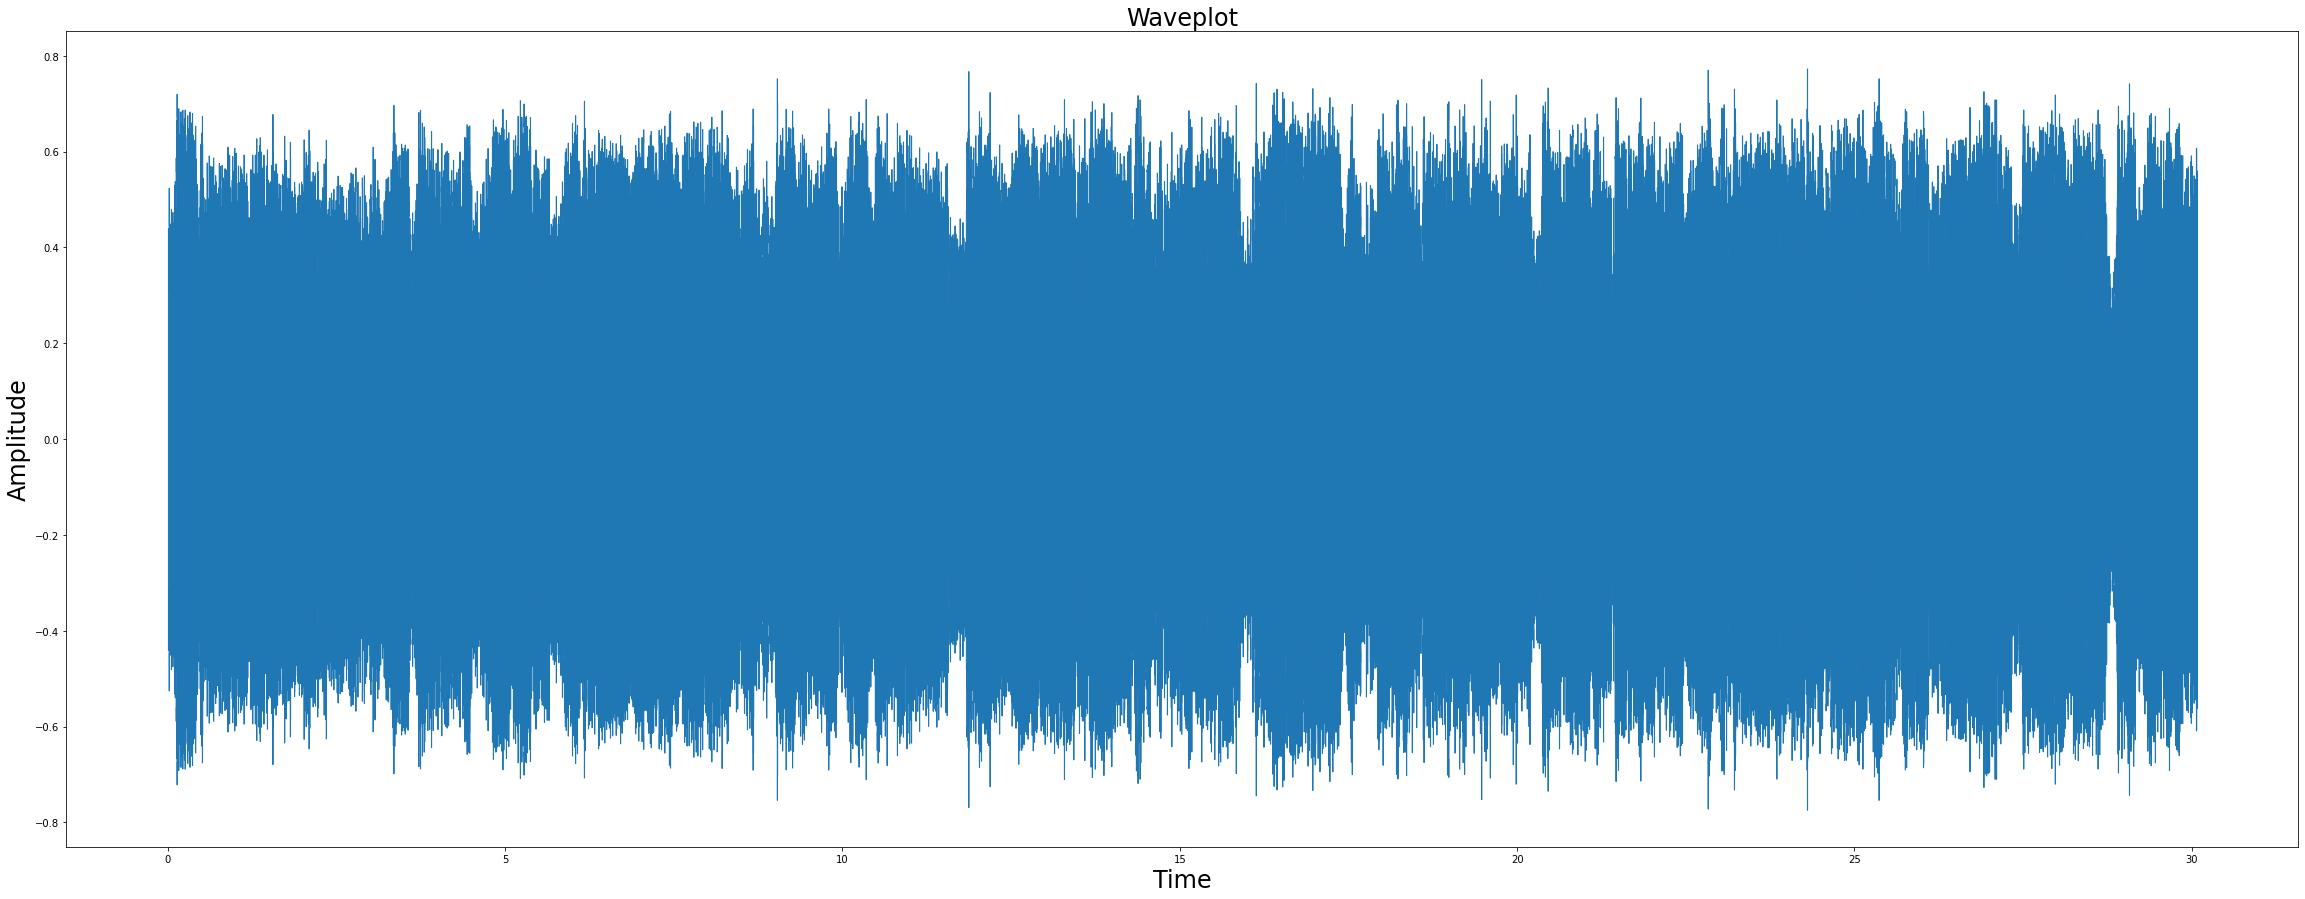

In [8]:
plt.figure(figsize=(40,15))
plt.title('Waveplot', fontdict=dict(size=24))
plt.xlabel("Time", fontdict=dict(size=24))
plt.ylabel("Amplitude", fontdict=dict(size=24))
librosa.display.waveshow(signal, sr=sr)


In [9]:
import IPython.display as ipd
ipd.Audio(signal,rate=sr)

# Function to load all the sounds from the GTZAN dataset

In [10]:
def get_sounds(link, genre):
    sounds=[]
    c_link= link.split(".")[0]
    for i in range(100):
        if i>=10:
            signal, sr = librosa.load(c_link+"."+str("000")+str(i)+".wav")
        else:
            signal, sr = librosa.load(c_link+"."+str("0000")+str(i)+".wav")
        start=0
        crop_size= 22050
        for j in range(30):
            sounds.append([signal[start:crop_size], genre])
    return sounds

# Mel spectrogram of the sample signal

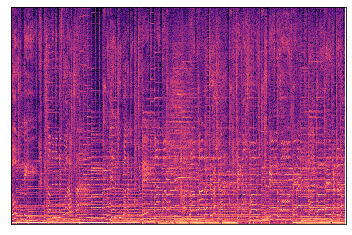

In [11]:

n_fft=2048
hops=512
audio_stft = librosa.core.stft(signal, hop_length=hops, n_fft=n_fft)
spectrogram = np.abs(audio_stft)
log_spectro = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectro, sr=sr, hop_length=hops, cmap='magma')

# Call the get_sounds for various genres

In [14]:
pop=get_sounds("C:\Work\Datasets\GTZAN\Data\genres_original\pop\pop.00000.wav", genre="pop")
reggae= get_sounds("C://Work//Datasets//GTZAN//Data//genres_original//reggae//reggae.00000.wav", genre="reggae")
metal= get_sounds("C:\Work\Datasets\GTZAN\Data\genres_original\metal\metal.00000.wav", genre='metal')
rock=get_sounds("C://Work//Datasets//GTZAN//Data//genres_original//rock//rock.00000.wav", genre='rock')
classical= get_sounds("C://Work//Datasets//GTZAN//Data//genres_original//classical//classical.00000.wav", "classical")
hiphop= get_sounds("C:\Work\Datasets\GTZAN\Data\genres_original\hiphop\hiphop.00000.wav", 'hiphop')
disco= get_sounds("C:\Work\Datasets\GTZAN\Data\genres_original\disco\disco.00000.wav", 'disco')
country= get_sounds("C:\Work\Datasets\GTZAN\Data\genres_original\country\country.00000.wav", 'country')
blues= get_sounds("C://Work//Datasets//GTZAN//Data//genres_original//blues//blues.00000.wav", 'blues')

# save_mels function convert the multiple small sounds into mel spectorgrams and save them respectively

In [15]:
def save_mels(sounds, folder, genre):
    n_fft=2048
    hops=512
    for i in range(len(sounds)):
        fig= plt.Figure()
        signal=sounds[i][0]
        file_name=genre + str(i)+ ".png"
        window = np.hanning(n_fft)
        canvas = FigureCanvas(fig)
        stft = librosa.core.stft(signal, hop_length=hops, n_fft=n_fft, window= window)
        spectrogram = np.abs(audio_stft)
        out = 2 * np.abs(stft) / np.sum(window)
        librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=fig.add_subplot(111))
        fig.savefig(folder+ file_name)

# Call save mells for different genres of music

In [16]:
save_mels(country, "C://Work//Datasets//Mel spectros//Country//", 'country')
save_mels(hiphop, "C://Work//Datasets//Mel spectros//Hiphop//", 'hiphop')
save_mels(reggae, "C://Work//Datasets//Mel spectros//reggae//", 'reggae')
save_mels(metal, "C://Work//Datasets//Mel spectros//Metal//", 'metal')
save_mels(rock, "C://Work//Datasets//Mel spectros//Rock//", 'rock')
save_mels(classical, "C://Work//Datasets//Mel spectros//Classical//", 'classical')
save_mels(disco, "C://Work//Datasets//Mel spectros//Disco//", 'disco')
save_mels(pop ,"C://Work\Datasets//Mel spectros//Pop//", 'pop')
save_mels(blues, "C://Work//Datasets//Mel spectros//Blues//", 'blues')